In [21]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [39]:
#!pip install six

#!pip install graphviz

#conda install graphviz
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
def evaluate_model(decision_tree,x_train_inp,x_test_inp,y_train_inp,y_test_inp):
    
    y_train_pred = decision_tree.predict(x_train_inp)
    y_test_pred = decision_tree.predict(x_test_inp)
    
    print("Train set evaluation")
    r2_score_train=r2_score(y_pred=y_train_pred,y_true=y_train_inp)
    #accuracy_score_train = accuracy_score(y_pred=y_train_pred,y_true=y_train_inp)
    confusion_matrix_train = confusion_matrix(y_pred=y_train_pred,y_true=y_train_inp)
    print("r2_score_train  ",r2_score_train)
    print("accuracy_score_train ",accuracy_score_train)
    print("confusion_matrix_train ",confusion_matrix_train)
    
    print("+++++++++++"*6)
    
    print("Test set evaluation")
    r2_score_test=r2_score(y_pred=y_test_pred,y_true=y_test_inp)
    #accuracy_score_test = accuracy_score(y_pred=y_test_pred,y_true=y_test_inp)
    confusion_matrix_test = confusion_matrix(y_pred=y_test_pred,y_true=y_test_inp)
    print("r2_score_test ",r2_score_test)
    print("accuracy_score_test ",accuracy_score_test)
    print("confusion_matrix_test ",confusion_matrix_test)



# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
def get_dt_graph(decision_tree,columns):
    dot_data = StringIO()  

    export_graphviz(decision_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=columns)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph
    


In [5]:
dataset = pd.read_csv("../Housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
#### converting all the yes no fields to 1/0 

column_to_map = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
mapper={
    'yes':1,
    'no':0
}

dataset[column_to_map] = dataset[column_to_map].apply(lambda x:x.map(mapper))

In [8]:
dataset[column_to_map]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [9]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
dummy_col = pd.get_dummies(dataSet['furnishingstatus'],drop_first=True)

In [11]:
dummy_col

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [12]:
dataset= pd.concat([dataset,dummy_col],axis=1)

In [13]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [14]:
dataset.drop(['furnishingstatus'],axis=1,inplace=True)

In [15]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [16]:
#### spliting into training and testing data

In [17]:
df_train,df_test = train_test_split(dataset,train_size=0.7,random_state=10)

In [18]:
df_train.shape

(381, 14)

In [19]:
df_test.shape

(164, 14)

In [20]:
### scaling the target variable only as its value will be very high also for 

In [22]:
scaler = MinMaxScaler()

In [26]:
df_train.price = scaler.fit_transform(df_train[['price']])
df_test.price = scaler.transform(df_test[['price']])

In [28]:
df_train.price.describe()

count    381.000000
mean       0.264227
std        0.167572
min        0.000000
25%        0.142424
50%        0.227273
75%        0.357576
max        1.000000
Name: price, dtype: float64

In [29]:
df_test.price.describe()

count    1.640000e+02
mean     4.685197e+06
std      1.712762e+06
min      1.750000e+06
25%      3.552500e+06
50%      4.291000e+06
75%      5.468750e+06
max      1.225000e+07
Name: price, dtype: float64

In [30]:
#### sppliting train and test into x and y variable

In [31]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test



In [43]:
dt = DecisionTreeRegressor(random_state=100,max_depth=4,min_samples_leaf=10)

In [44]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=100)

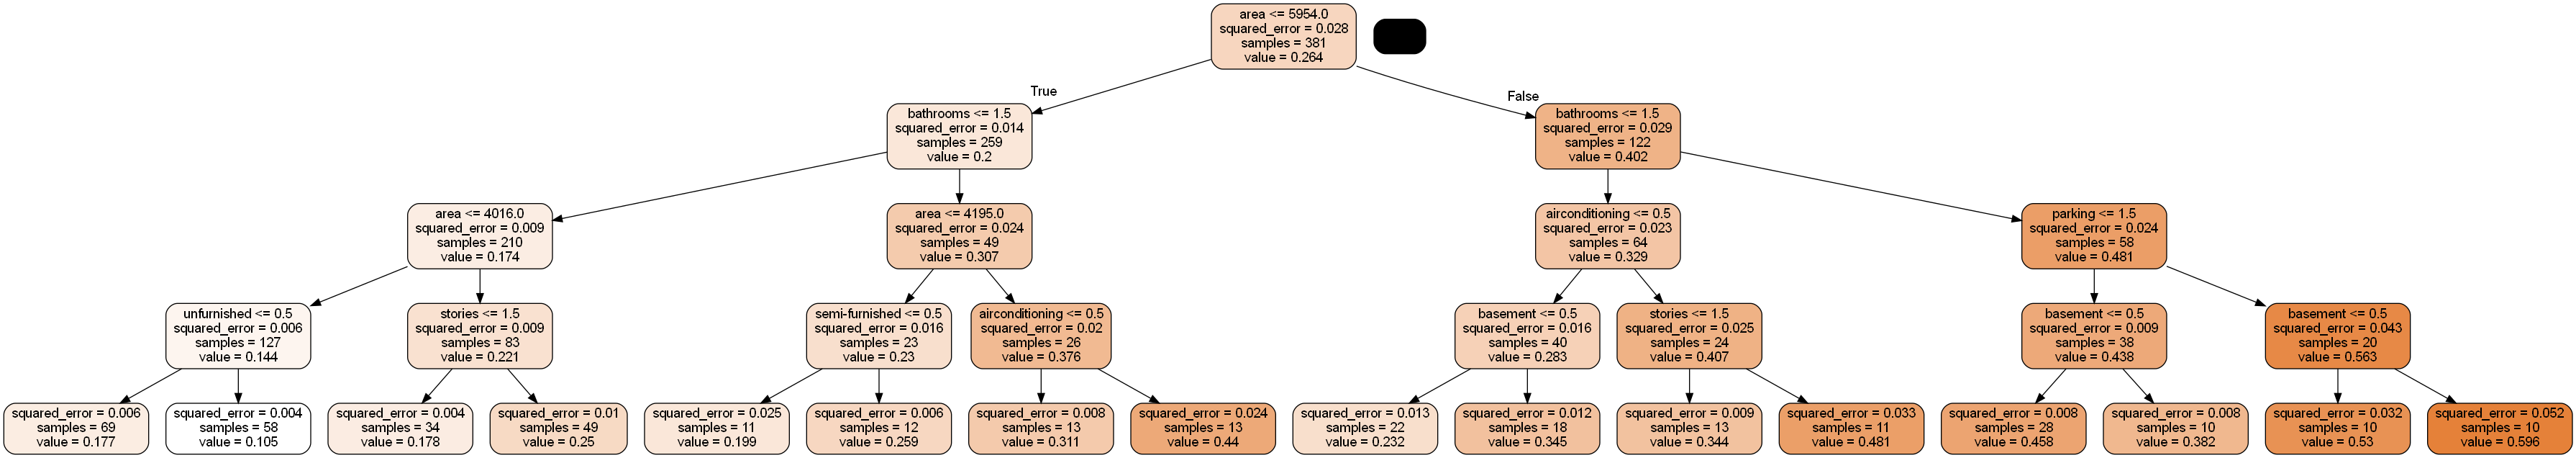

In [45]:
graph = get_dt_graph(dt,X_train.columns)
Image(graph.create_png())

In [46]:
evaluate_model(dt,X_train,X_test,y_train,y_test)

Train set evaluation


ValueError: continuous is not supported

In [47]:
r2_score(y_train,dt.predict(X_train))

0.6077765912122629

In [48]:
r2_score(y_test,dt.predict(X_test))

-7.5286635451124955